<a href="https://colab.research.google.com/github/Yoav012/IntroToAeroTau/blob/main/notebooks/04_vortex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vortex



what is the most important thing we want from applied aerodynamics? We want to make things fly, of course! And to fly, there must be a force of *aerodynamic lift* to counteract the weight of the object.

In this section of the course, we learn about lift. First, we will compute the flow of a potential vortex. It turns out, vortex circulation and lift are intimately related.

## What's a vortex?

This question is deeper than you might think! The simple answer is that a vortex is motion in circular streamlines. Imagine streamlines that are concentric circles about a given point—what's confusing is that this _does not mean_ that fluid elements are themselves rotating!

In an irrotational vortex, the tangential velocity is constant along a (circular) streamline and inversely proportional to the radius, while the radial velocity is zero. In polar coordinates:

\begin{equation}
u_\theta\left(r,\theta\right) = \frac{\text{constant}}{r}  \quad \text{,} \quad  u_r\left(r,\theta\right) = 0
\end{equation}

The vorticity is zero everywhere, except at the location of the point vortex, where the derivative of $u_\theta$ is infinite.

We introduced the concept of circulation in the first lesson ([Source & Sink](01_Lesson01_sourceSink.ipynb)). Let's use that. Around any circular streamline enclosing the vortex, and using the sign convention that a negative vortex circulates anti-clockwise, we have:

\begin{equation}\Gamma = -\oint \mathbf{v}\cdot d\vec{l} = -u_\theta 2 \pi r\end{equation}

Thus, the constant in the expression for $u_\theta$ in $(1)$ is equal to $\Gamma/2\pi$, and we now write:

\begin{equation}u_\theta\left(r,\theta\right) = \frac{\Gamma}{2\pi r}\end{equation}

We can get the stream function by integrating the velocity components:

\begin{equation}\psi\left(r,\theta\right) = \frac{\Gamma}{2\pi}\ln r\end{equation}

In Cartesian coordinates, the stream function is

\begin{equation}\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left(x^2+y^2\right)\end{equation}

while the velocity components would be:

\begin{equation}u\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2} \qquad v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}\end{equation}

This vortex flow is irrotational everywhere, except at the vortex center, where it is infinite. The strength of the point vortex is equal to the circulation $\Gamma$ around it.

## Let's compute a vortex

The set-up is the same as before: we load our favorite libraries, and we create a grid of points to evaluate the velocity field.

In [85]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [86]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

Give your vortex a strength $\Gamma=5$ and place it at the center of your domain:

In [87]:
gamma = 50.0                      # strength of the vortex
x_vortex, y_vortex = 0.5,0.0   # location of the vortex


We will define two functions,

* `get_velocity_vortex()` and
* `get_stream_function_vortex()`,

to compute the velocity components and the stream function on our Cartesian grid, given the strength and the location of the vortex. Then, we will use our custom functions to evaluate everything on the grid points. Let's write those functions first.

In [88]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.

    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)

    return u, v

In [89]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.

    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * numpy.log((X - xv)**2 + (Y - yv)**2)

    return psi

An now, call the functions with the vortex strength and position, plus the coordinates of the evaluation grid, to get the velocity and streamfunction of the vortex.

In [90]:
# compute the velocity field on the mesh grid
u_vortex, v_vortex= get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)


# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

We are now able to visualize the streamlines of a vortex, and they look like concentric circles around the vortex center, as expected.

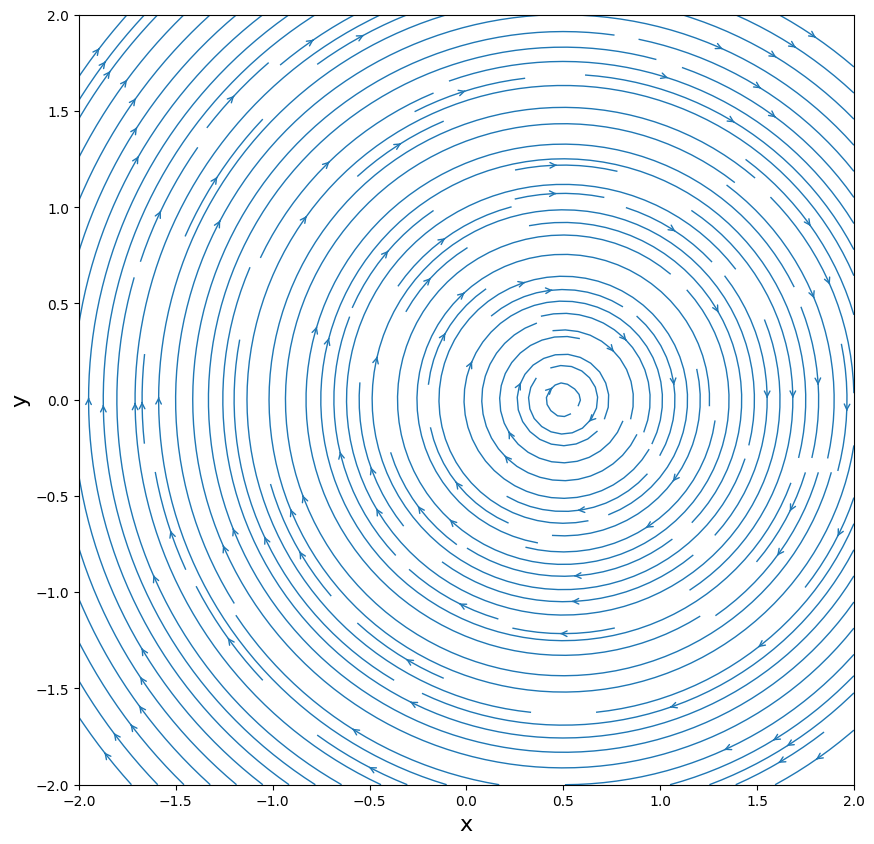

In [91]:
# plot the streamlines
u=u_vortex
v=v_vortex
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

## Vortex & Sink

For fun, let's use our superposition powers. Add a vortex to a sink, using two new functions to compute the velocity components and the stream function of the sink, and adding to those of a vortex (remember that the sink can be easily replaced by a source by just changing the sign of the strength).

In [92]:
strength_sink = -10.0            # strength of the sink
x_sink, y_sink = 0.0, 0.0       # location of the sink

In [93]:
def get_velocity_sink(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a sink.

    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * math.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * math.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)

    return u, v

In [94]:
def get_stream_function_sink(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a sink.

    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * math.pi) * numpy.arctan2((Y - ys), (X - xs))

    return psi

In [95]:
# compute the velocity field on the mesh grid
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the mesh grid
psi_sink = get_stream_function_sink(strength_sink, x_sink, y_sink, X, Y)

Now, let's visualize the streamlines of the vortex-sink, and admire our artistic creation:

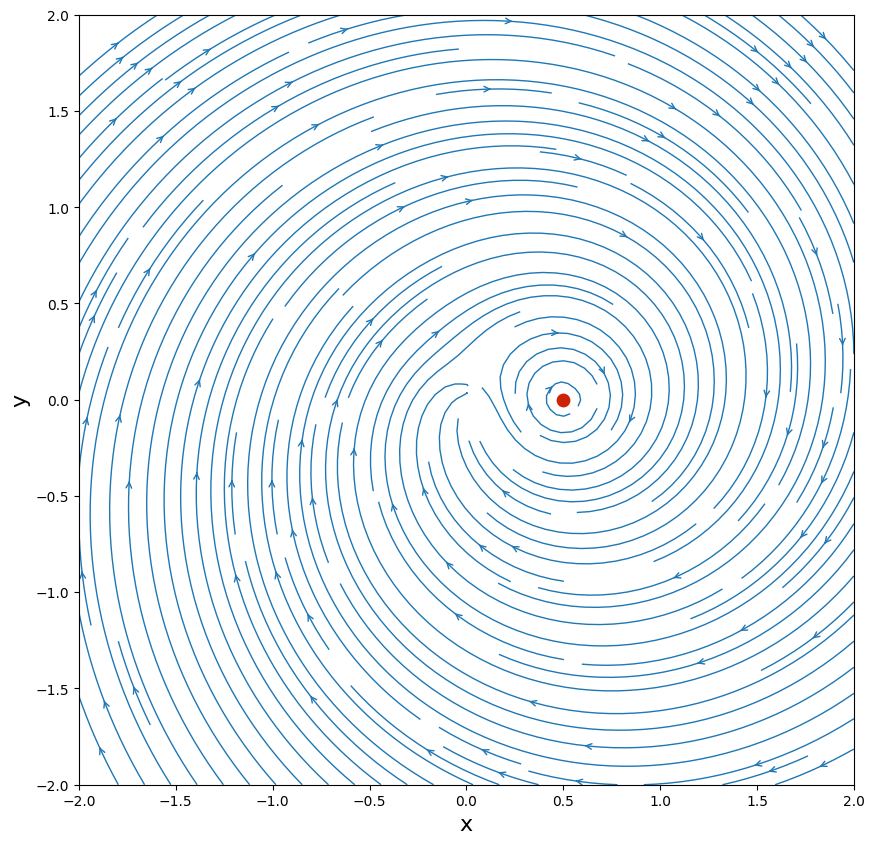

In [96]:
# superposition of the sink and the vortex
u = u_vortex + u_sink
v = v_vortex + v_sink
psi = psi_vortex + psi_sink

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

Very cool op-art. (And a good model for your typical bath-tub vortex.) But is all this useful? Yes!

First, you will take your training wheels off and—on your own—compute the flow of an [infinite row of vortices](05_Lesson05_InfiniteRowOfVortices.ipynb). Your mission, should you choose to accept it, is in the next notebook.

After that, we will learn about the connection between a vortex, and the force of lift. This turns out to be very important in aerodynamics!

## What's this "irrotational" vortex thing?

I know what you are thinking.

What does it mean that the vortex is *irrotational*? Surely if there's a vortex, there's rotation!

You are not crazy. It's natural to think this way, but the potential vortex is a flow where streamlines are circular, yet fluid elements do not rotate around themselves—they just go around the circular path.

This classic video will help you understand ... just watch the 25 seconds of video after time 4m 25s, and see a "vorticity meter" go around a free vortex without rotating itself.

Remember: vorticity measures the local angular velocity of each fluid element. If the fluid elements go around a circular path, but do not spin themselves, there is no vorticity!

This animation from [Wikipedia](http://en.wikipedia.org/wiki/Vortex#Irrotational_vortices) helps further illustrate what happens in an irrotational vortex: the orange markers with a line across them are going around in circles, but they are not themselves rotating (notice the white lines keep their orientation).

<img src="http://upload.wikimedia.org/wikipedia/commons/0/0b/Irrotational_vortex.gif">




---

Next try to aplly the superposition for obtainning flow over a cylinder with lift (magnus effect

<div dir="rtl" style="text-align: right;">

<h3>סיכום השפעת פרמטרים על הזרימה במודל הערבול (Vortex)</h3>

<p dir="rtl" style="text-align: right;">
במהלך הרצת המחברת ובחינת השפעת הפרמטרים השונים, בדקנו את השינויים הבאים:
</p>
<ul>
<li><strong>עוצמת הערבול (Γ - Gamma):</strong>
<ul>
<li>הגדלת עוצמת הערבול גרמה לעלייה במהירות הזרימה הסיבובית סביב מרכז הערבול.</li>
<li>ככל ש-Γ גדול יותר, קווי הזרם נעשו צפופים יותר ליד מרכז הערבול, והזרימה הפכה למהירה יותר ברדיוסים קרובים למרכז.</li>
</ul>
</li>

<li><strong>מיקום הערבול:</strong>
<ul>
<li>שינוי מיקום הערבול גרם לשינוי מבנה שדה הזרימה והסיט את מרכז הסיבוב לאזור חדש במרחב.</li>
<li>המיקום החדש השפיע על פריסת קווי הזרם ועל התפלגות הלחץ סביב הערבול.</li>
</ul>
</li>

<li><strong>סופרפוזיציה עם בור (Sink):</strong>
<ul>
<li>שילוב של וורטקס ובור יצר שדה זרימה אסימטרי בעל תנועה סיבובית וזרימה כלפי מרכז הבור.</li>
<li>קווי הזרם במודל המשולב הציגו התכנסות ברורה למרכז עם סיבוב משמעותי מסביבו.</li>
</ul>
</li>

</div>
